# Notebook Imports

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

sns.set_style('darkgrid')
%matplotlib inline

# Gather Data

[Source: Original research paper](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y)

In [29]:
boston_dataset = load_boston()

In [30]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [31]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [32]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Data Points and Features

In [33]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [34]:
# Actual Price in Thousands (000s)
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Data Exploration with Pandas Dataframes

In [35]:
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

In [36]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [37]:
# Adding the price target column to the dataframe
data['PRICE'] = boston_dataset.target

In [38]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [39]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [40]:
#  Showing the number of rows for each column
data.count() 

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning Data - Check for Missing Values

In [41]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

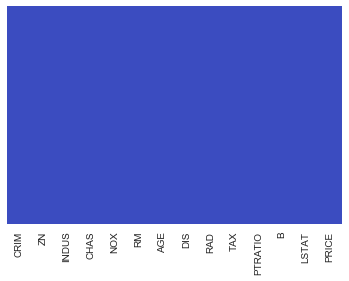

In [42]:
sns.heatmap(data.isnull(), cmap='coolwarm', yticklabels=False, cbar=False)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [44]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Visualising Data - Histograms, Distributions and Bar Charts

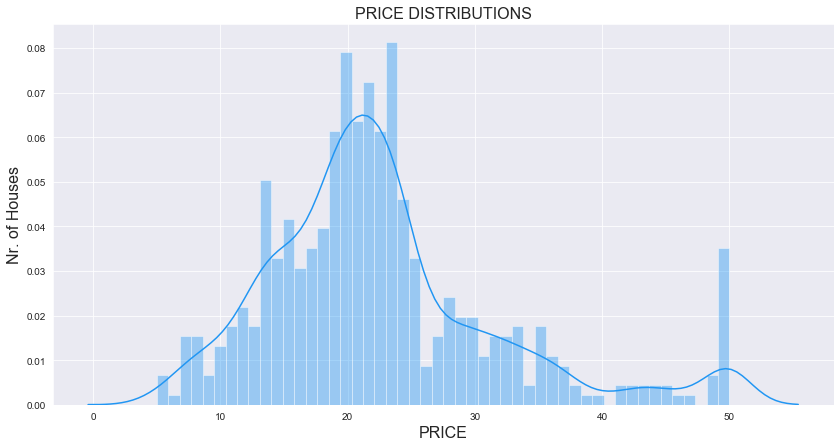

In [45]:
plt.figure(figsize=(14,7))
plt.ylabel('Nr. of Houses', fontsize=16)
plt.xlabel('PRICE in 000s', fontsize=16)
plt.title('PRICE DISTRIBUTIONS', fontsize=16)

sns.distplot(data['PRICE'], bins=50, kde=True, color='#2196f3')
plt.show()

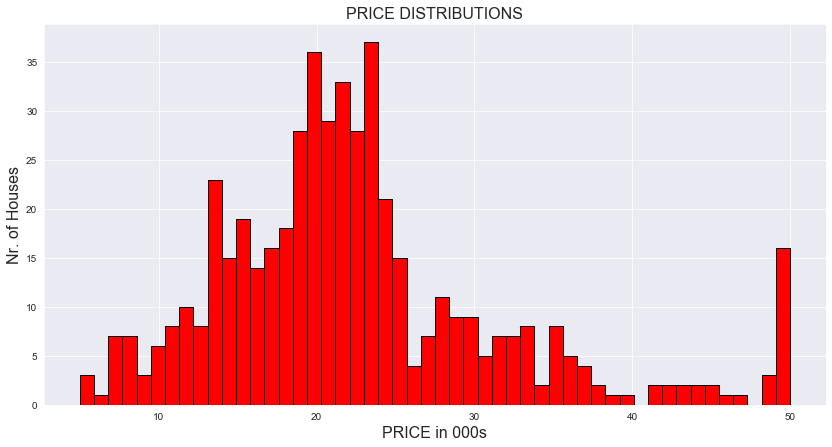

In [46]:
plt.figure(figsize=(14,7))
plt.tight_layout()
plt.ylabel('Nr. of Houses', fontsize=16)
plt.xlabel('PRICE in 000s', fontsize=16)
plt.title('PRICE DISTRIBUTIONS', fontsize=16)

plt.hist(data['PRICE'], bins=50, ec='black', color='red')
plt.show()

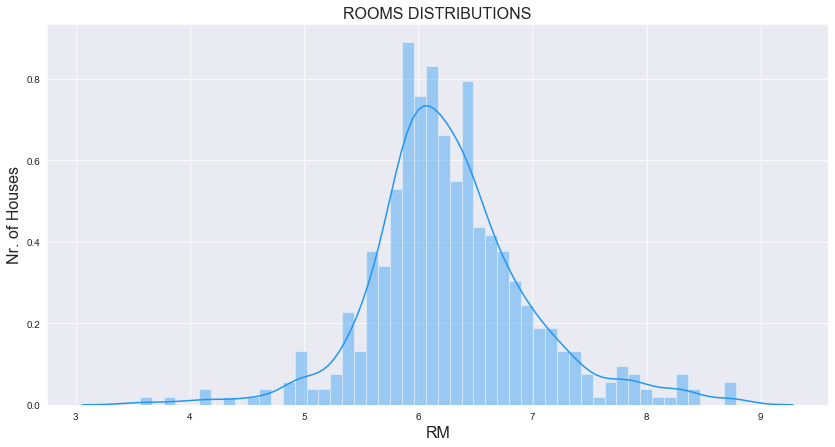

In [47]:
plt.figure(figsize=(14,7))
plt.ylabel('Nr. of Houses', fontsize=16)
plt.xlabel('AVERAGE NUMBER OF ROOMS', fontsize=16)
plt.title('ROOMS DISTRIBUTIONS', fontsize=16)

sns.distplot(data['RM'], bins=50, kde=True, color='#2196f3')
plt.show()

In [48]:
data['RM'].mean()

6.284634387351787

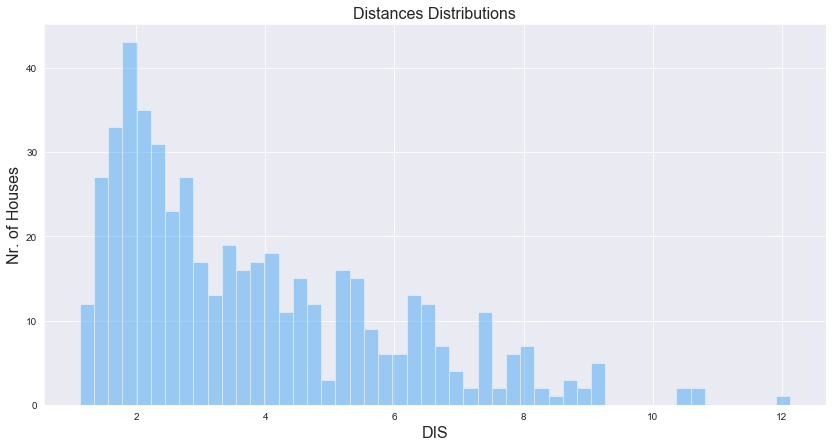

In [49]:
plt.figure(figsize=(14,7))
plt.ylabel('Nr. of Houses', fontsize=16)
plt.xlabel('weighted distances', fontsize=16)
plt.title('Distances Distributions', fontsize=16)

sns.distplot(data['DIS'], bins=50, kde=False, color='#2196f3')
plt.show()

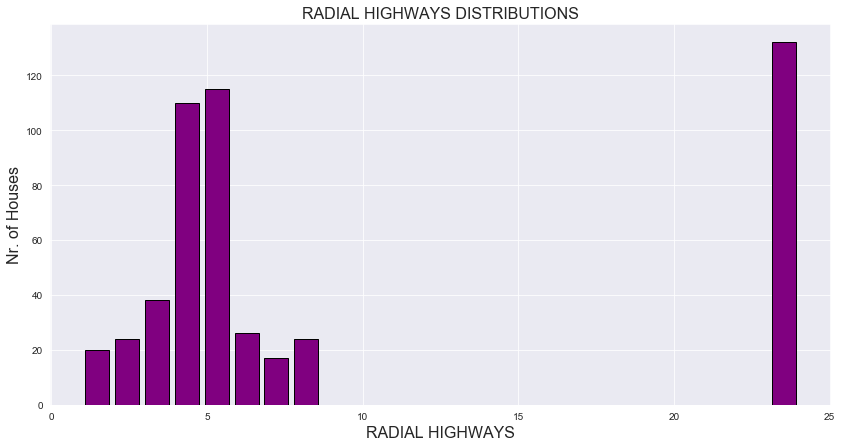

In [50]:
plt.figure(figsize=(14,7))
plt.ylabel('Nr. of Houses', fontsize=16)
plt.xlabel('RADIAL HIGHWAYS', fontsize=16)
plt.title('RADIAL HIGHWAYS DISTRIBUTIONS', fontsize=16)

plt.hist(data['RAD'], bins=24, ec='black', color='purple', rwidth=0.8)
plt.show()

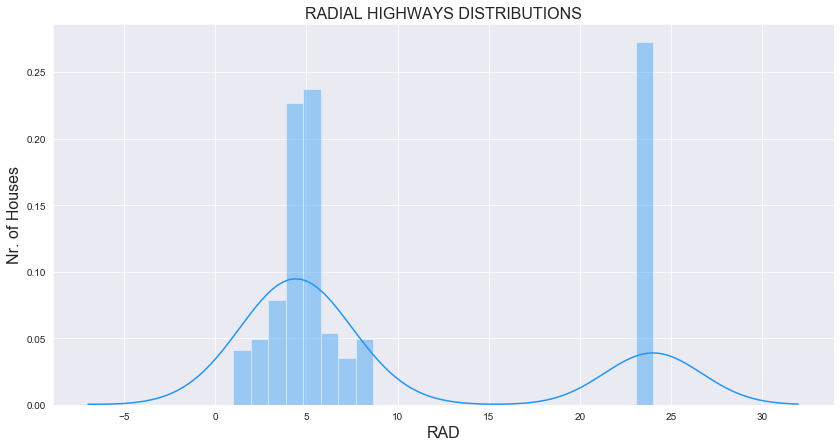

In [51]:
plt.figure(figsize=(14,7))
plt.ylabel('Nr. of Houses', fontsize=16)
plt.xlabel('RADIAL HIGHWAYS', fontsize=16)
plt.title('RADIAL HIGHWAYS DISTRIBUTIONS', fontsize=16)

sns.distplot(data['RAD'], bins=24, kde=True, color='#2196f3')
plt.show()

In [52]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

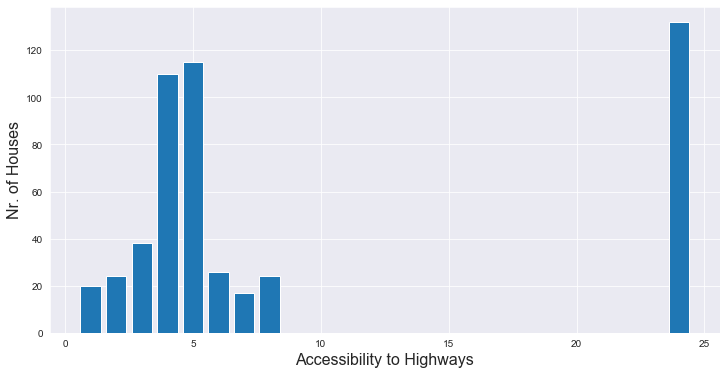

In [53]:
frequency = data['RAD'].value_counts()
#type(frequency)
#frequency.index
#frequency.axes[0]
plt.figure(figsize=(12, 6))
plt.xlabel('Accessibility to Highways', fontsize=16)
plt.ylabel('Nr. of Houses', fontsize=16)

plt.bar(frequency.index, height=frequency)
plt.show()

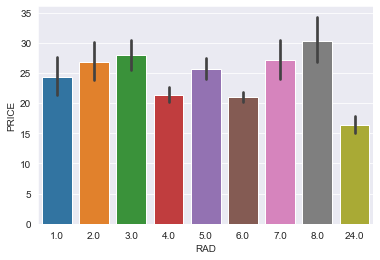

In [54]:
sns.barplot(x='RAD', y='PRICE', data=data)

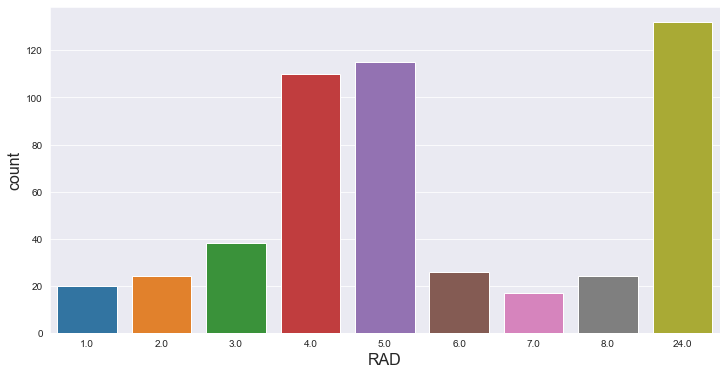

In [55]:
plt.figure(figsize=(12, 6))
plt.xlabel('Accessibility to Highways', fontsize=16)
plt.ylabel('Nr. of Houses', fontsize=16)

sns.countplot(x='RAD', data=data)
plt.show()

In [56]:
data[data['RAD'] > 20]['RAD'].value_counts()

24.0    132
Name: RAD, dtype: int64

In [57]:
data[data['RAD'] > 20].count()

CRIM       132
ZN         132
INDUS      132
CHAS       132
NOX        132
RM         132
AGE        132
DIS        132
RAD        132
TAX        132
PTRATIO    132
B          132
LSTAT      132
PRICE      132
dtype: int64

In [58]:
data[data['RAD'] > 20]['PRICE'].describe()

count    132.000000
mean      16.403788
std        8.539745
min        5.000000
25%       11.225000
50%       14.400000
75%       19.900000
max       50.000000
Name: PRICE, dtype: float64

In [59]:
data[data['RAD'] < 20]['PRICE'].describe()

count    374.000000
mean      24.695989
std        8.421564
min        7.000000
25%       19.400000
50%       22.650000
75%       28.400000
max       50.000000
Name: PRICE, dtype: float64

In [60]:
sum(data['RAD'] < 20)

374

In [61]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [62]:
data[data['CHAS'] == 1]['PRICE'].describe()

count    35.000000
mean     28.440000
std      11.816643
min      13.400000
25%      21.100000
50%      23.300000
75%      33.150000
max      50.000000
Name: PRICE, dtype: float64

In [63]:
data[data['CHAS'] == 0]['PRICE'].describe()

count    471.000000
mean      22.093843
std        8.831362
min        5.000000
25%       16.600000
50%       20.900000
75%       24.800000
max       50.000000
Name: PRICE, dtype: float64

## Descriptive Statistics

In [64]:
data['PRICE'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64

In [65]:
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [66]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [67]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation

### $$ \rho_{XY} = corr(X,Y)$$
### $$ -1.0 \leq \rho_{XY} \leq +1.0 $$

In [1]:
data['PRICE'].corr(data['RM'])

NameError: name 'data' is not defined

In [69]:
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375621

In [70]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [71]:
data['PTRATIO'].describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

In [72]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

In [73]:
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

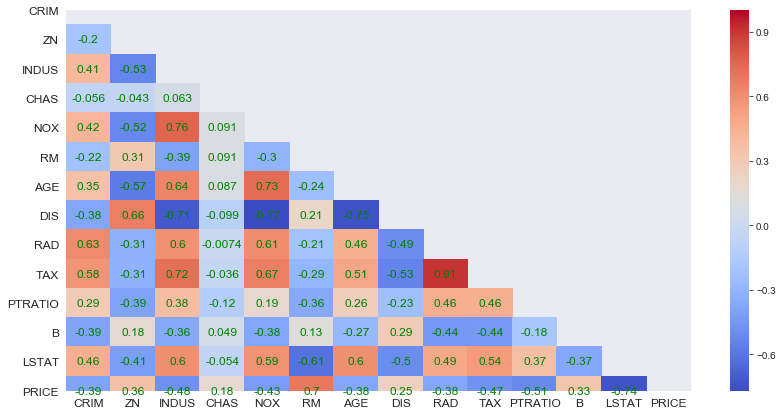

In [74]:
plt.figure(figsize=(14,7))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', mask=mask, annot_kws={"size": 12, "color":"green"})
plt.show()

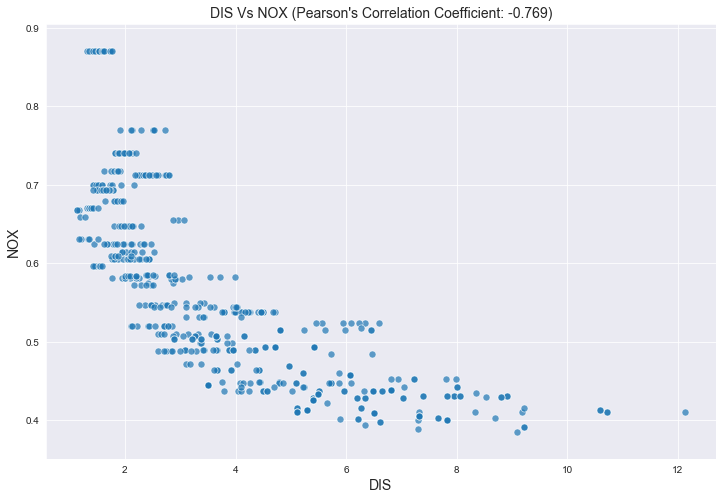

In [75]:
nox_dis_corr = round(data['DIS'].corr(data['NOX']), 3)

plt.figure(figsize=(12,8))
plt.title(f'DIS Vs NOX (Pearson\'s Correlation Coefficient: {nox_dis_corr})', fontsize=14)
plt.xlabel('DIS - Distance from Employment Centres', fontsize=14)
plt.ylabel('NOX - Nitric Oxide Pollution', fontsize=14)
sns.scatterplot(x='DIS', y='NOX', data=data, s=50, alpha=0.7)
plt.show()

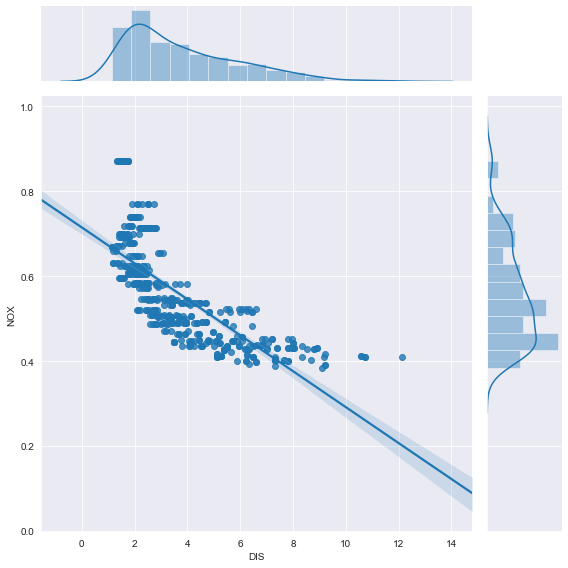

In [76]:
sns.jointplot(x='DIS', y='NOX', data=data,  height=8, kind='reg') #{ scatter,reg,resid,kde,hex }
plt.show()

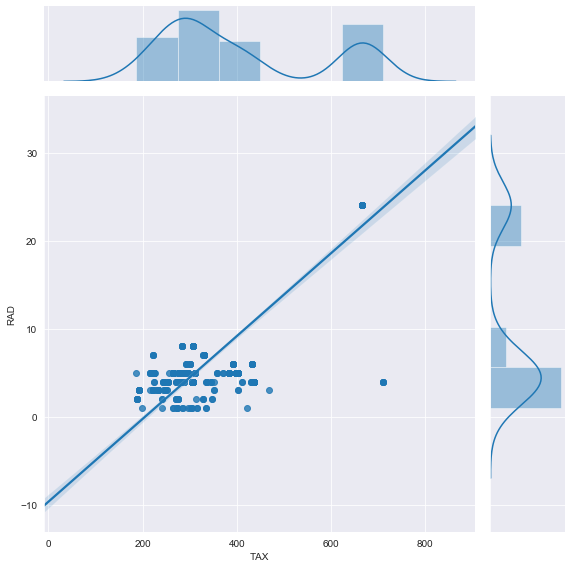

In [77]:
sns.jointplot(x='TAX', y='RAD', data=data,  height=8, kind='reg')
plt.show()

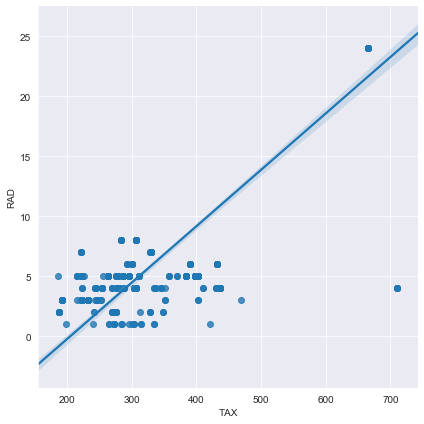

In [78]:
sns.lmplot(x='TAX', y='RAD', data=data,  height=6)
plt.show()

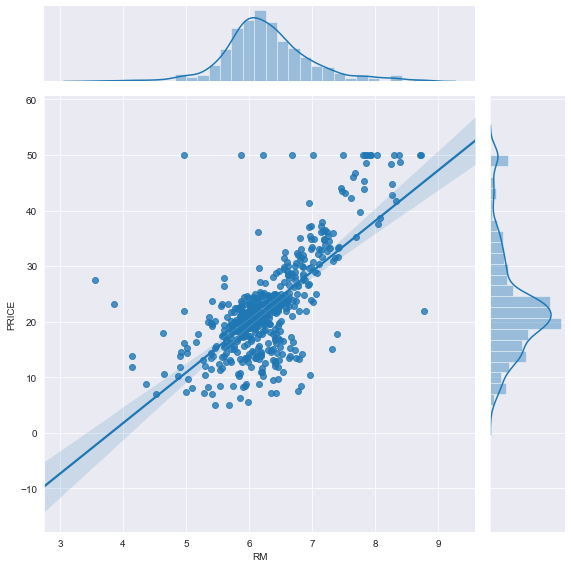

In [79]:
sns.jointplot(x='RM', y='PRICE', data=data,  height=8, kind='reg')
plt.show()

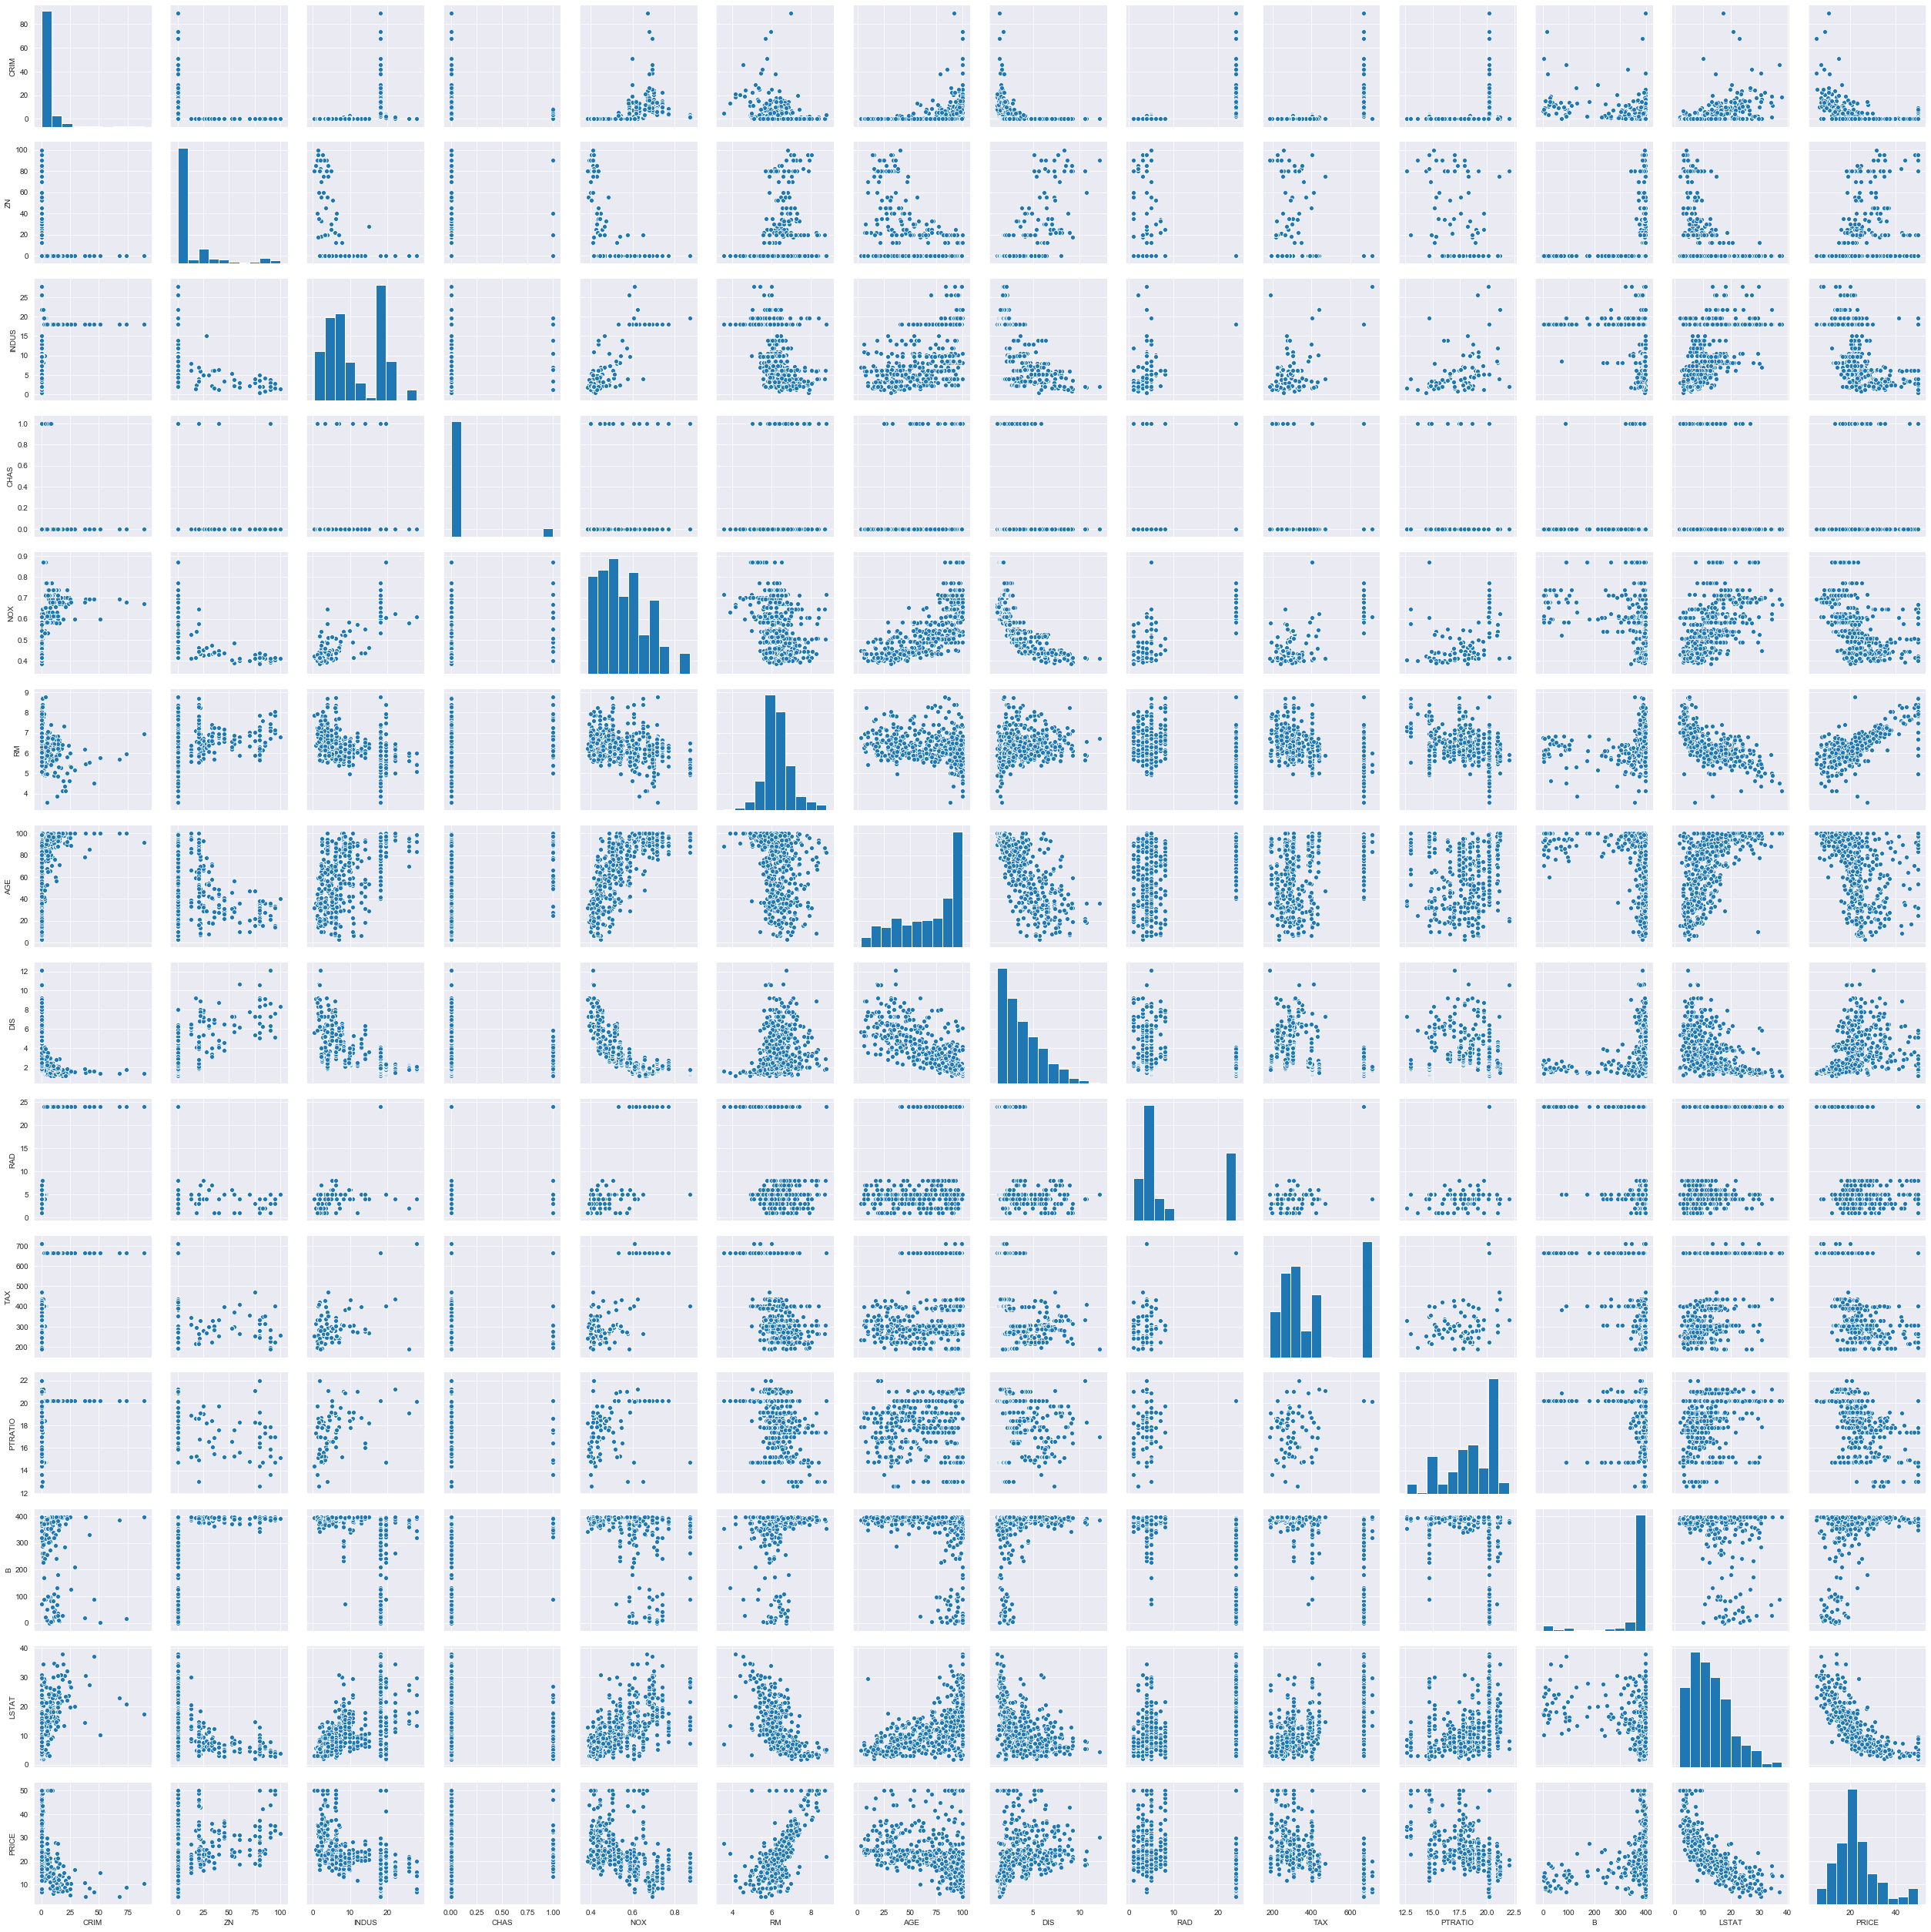

Wall time: 1min 12s


In [80]:
%%time

sns.pairplot(data=data)
plt.show()

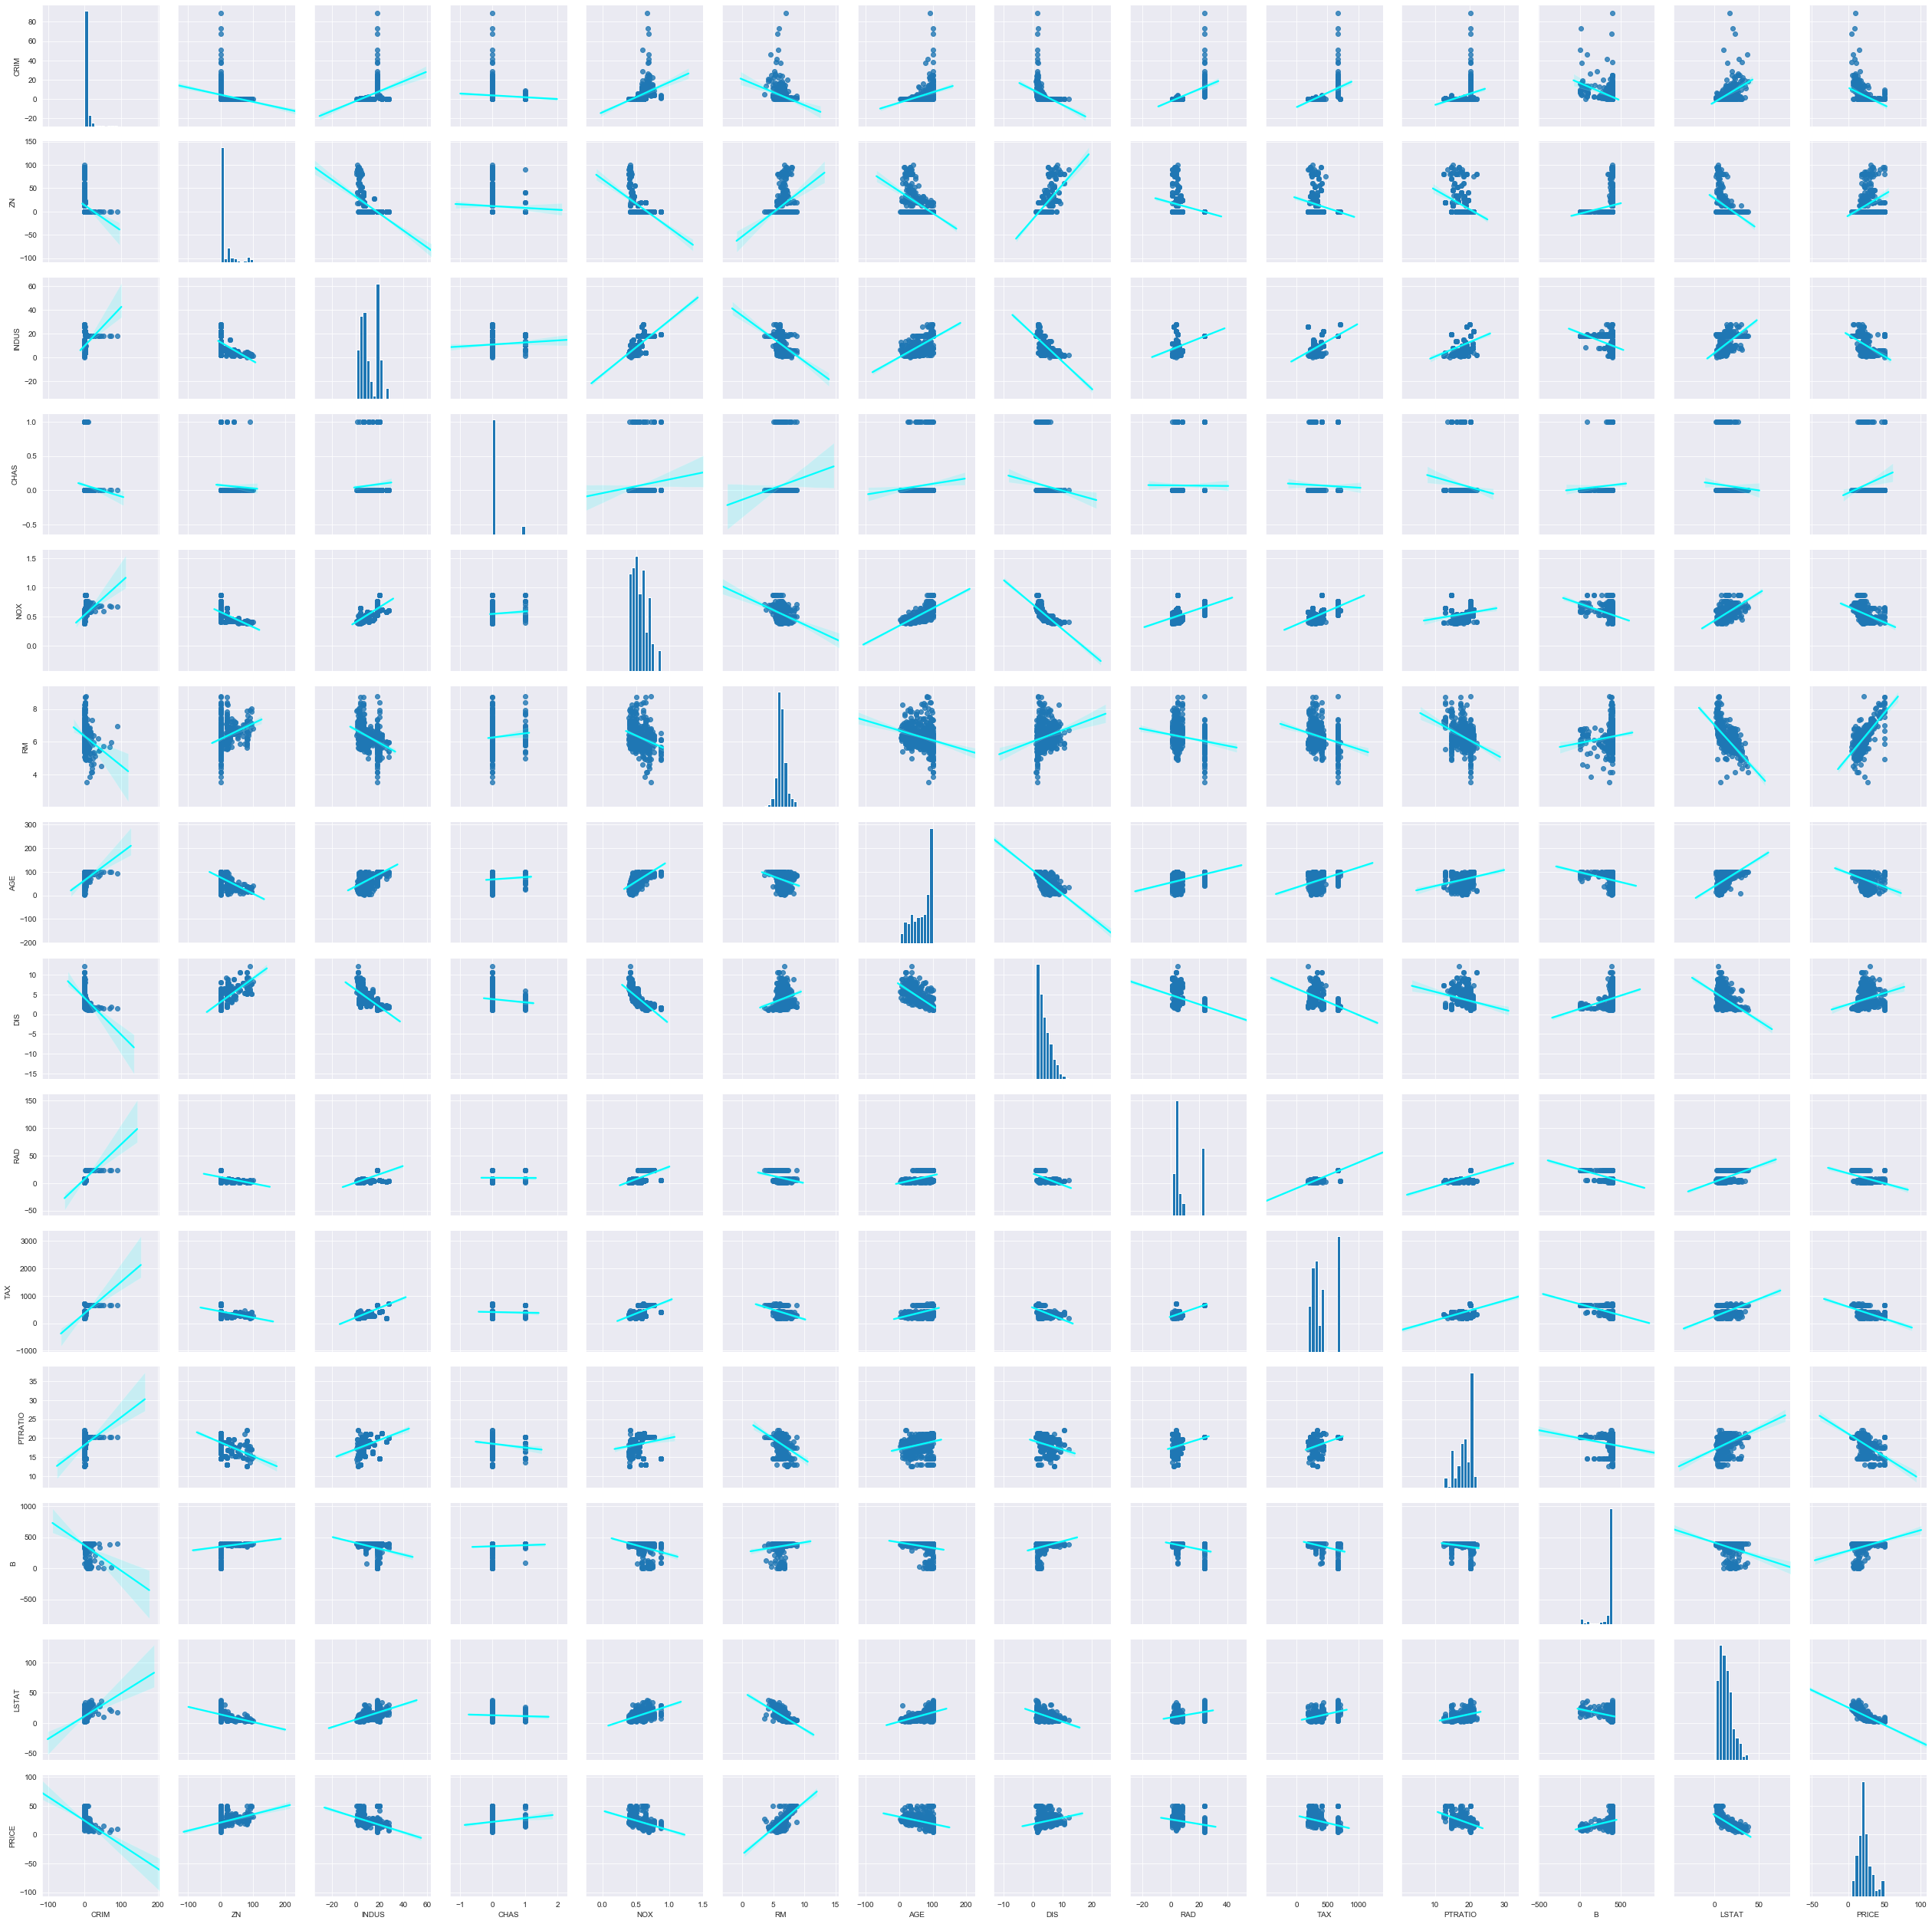

Wall time: 1min 53s


In [81]:
%%time

sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color': 'cyan'}})
plt.show()

# Training and Testing Split

In [82]:
prices = data['PRICE']
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

In [83]:
# Percentages of the training and test data set
print(len(X_train)/len(features))
print(X_test.shape[0]/features.shape[0])

0.7984189723320159
0.2015810276679842


## Multivariable Regression

In [84]:
regr = LinearRegression()
regr.fit(X_train,y_train)

print('Intercept: ', regr.intercept_ )
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coef'])

Intercept:  36.53305138282433


,Coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [85]:
print('The R-Squared value for the Training Data Set:', regr.score(X_train,y_train))
print('The R-Squared value for the Test Data Set:', regr.score(X_test,y_test))

The R-Squared value for the Training Data Set: 0.750121534530608
The R-Squared value for the Test Data Set: 0.6709339839115641


## Data Transformations

In [86]:
data['PRICE'].skew()

1.1080984082549072

In [87]:
y_log = np.log(data['PRICE'])
y_log.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: PRICE, dtype: float64

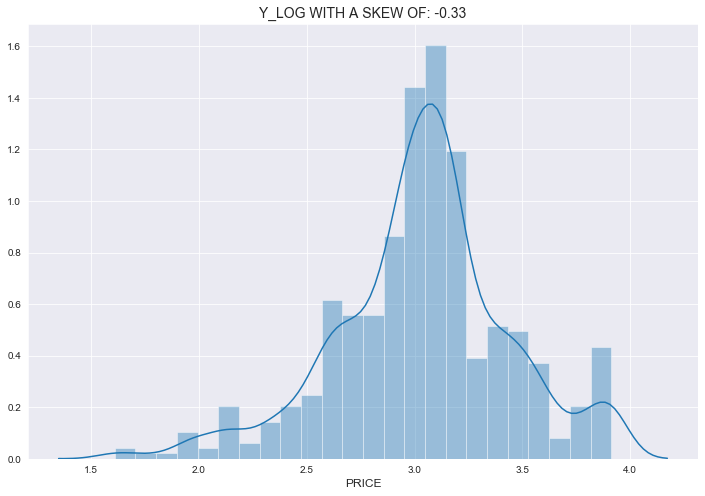

In [88]:
y_log_skewrounded = round(y_log.skew(), 2)

plt.figure(figsize=(12,8))
plt.title(f'Y_LOG WITH A SKEW OF: {y_log_skewrounded}', fontsize=14)
plt.xlabel('LOG PRICES', fontsize=12)
sns.distplot(y_log)
plt.show()

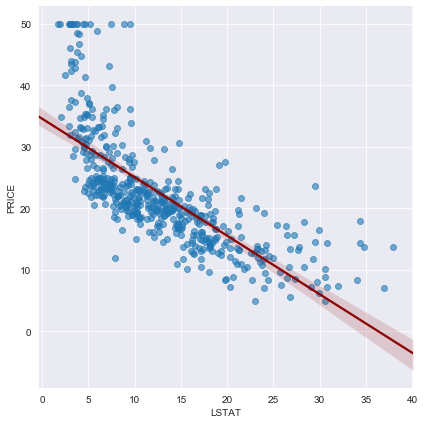

In [89]:
sns.lmplot(x='LSTAT', y='PRICE', data=data, height=6, scatter_kws={'alpha':0.6}, line_kws={'color':'darkred'})
plt.show()

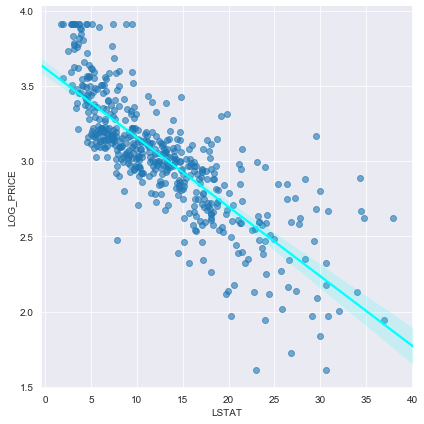

In [90]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log


sns.lmplot(x='LSTAT', y='LOG_PRICE',  data=transformed_data, height=6,
           scatter_kws={'alpha':0.6}, line_kws={'color':'cyan'})
plt.show()

## Regression Using Log Prices

In [91]:
prices = np.log(data['PRICE']) # Use Log Prices
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)


regr = LinearRegression()
regr.fit(X_train,y_train)

print('Intercept: ', regr.intercept_ )
print('The R-Squared value for the Training Data Set:', regr.score(X_train,y_train))
print('The R-Squared value for the Test Data Set:', regr.score(X_test,y_test))

coef_data = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Log Coef'])

Intercept:  4.059943871775184
The R-Squared value for the Training Data Set: 0.7930234826697584
The R-Squared value for the Test Data Set: 0.7446922306260728


In [92]:
# Changing the coefficients from log
coef_data['Coef'] = np.e**(coef_data['Log Coef'])
coef_data

,Log Coef,Coef
CRIM,-0.010672,0.989385
ZN,0.001579,1.001581
INDUS,0.002030,1.002032
CHAS,0.080331,1.083645
NOX,-0.704068,0.494569
RM,0.073404,1.076166
AGE,0.000763,1.000764
DIS,-0.047633,0.953483
RAD,0.014565,1.014672
TAX,-0.000645,0.999355


## P Values and Evaluating Coefficients

In [93]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const) # Ordinary Least Squares - takes the target values and the features
results = model.fit()

pd.DataFrame({'coef':results.params, 'pvalues': round(results.pvalues, 3)})

C:\Users\GTVICTOR\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,coef,pvalues
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


## Testing for Multicolinearity

$$ TAX = \alpha _0 + \alpha _1 RM + \alpha _2 NOX + ... + \alpha _{12}LSTAT $$

$$ VIF _{TAX} = \frac{1}{(1 - R _{TAX} ^ 2)} $$

In [94]:
variance_inflation_factor(exog=X_incl_const.values, exog_idx=1)

1.714525044393249

In [95]:
len(X_incl_const.columns)
X_incl_const.shape[1]

14

In [96]:
vif = []
for i in range(X_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))
print(vif)

[597.5487126763895, 1.714525044393249, 2.3328224265597597, 3.943448822674638, 1.0788133385000576, 4.410320817897634, 1.8404053075678573, 3.3267660823099394, 4.222923410477865, 7.314299817005058, 8.508856493040808, 1.8399116326514058, 1.3386713255364715, 2.812544292793036]


In [97]:
# using list comprehension
vif = [variance_inflation_factor(exog=X_incl_const.values, exog_idx=i) for i in range(X_incl_const.shape[1])]

pd.DataFrame({'coef_name': X_incl_const.columns, 'vif': np.around(vif, 2)})  #.set_index('coef_name')

,coef_name,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


## Model Simplification and the BIC

In [98]:
# Original model with log prices and all features
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const) # Ordinary Least Squares - takes the target values and the features
results = model.fit()

org_coef = pd.DataFrame({'coef':results.params, 'pvalues': round(results.pvalues, 3)})

print('BIC is ', results.bic)
print('R-Squared is ', results.rsquared)

BIC is  -139.7499776947892
R-Squared is  0.7930234826697584


In [99]:
# Reduced model #1 excluding INDUS
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS'], axis=1)


model = sm.OLS(y_train, X_incl_const) # Ordinary Least Squares - takes the target values and the features
results = model.fit()

org_coef_noINDUS = pd.DataFrame({'coef':results.params, 'pvalues': round(results.pvalues, 3)})

print('BIC is ', results.bic)
print('R-Squared is ', results.rsquared)

BIC is  -145.1450885559114
R-Squared is  0.7927126289415163


In [100]:
# Reduced model #2 excluding INDUS and AGE
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS', 'AGE'], axis=1)


model = sm.OLS(y_train, X_incl_const) # Ordinary Least Squares - takes the target values and the features
results = model.fit()

org_coef_noINDUSandAGE = pd.DataFrame({'coef':results.params, 'pvalues': round(results.pvalues, 3)})

print('BIC is ', results.bic)
print('R-Squared is ', results.rsquared)

BIC is  -149.49934294224678
R-Squared is  0.7918657661852816


In [101]:
frames = [org_coef, org_coef_noINDUS, org_coef_noINDUSandAGE]
pd.concat(frames, axis=1, sort=False)

,coef,pvalues,coef,pvalues,coef,pvalues
const,4.059944,0.000,4.056231,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001551,0.010,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
RM,0.073404,0.000,0.071739,0.000,0.076133,0.000
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


## Residuals and Residual plots

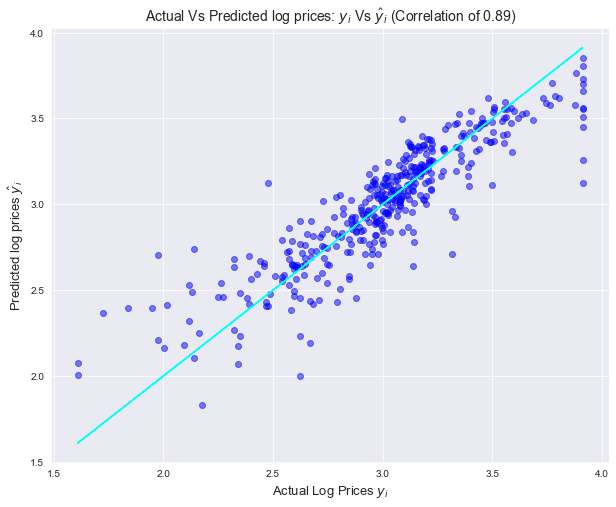

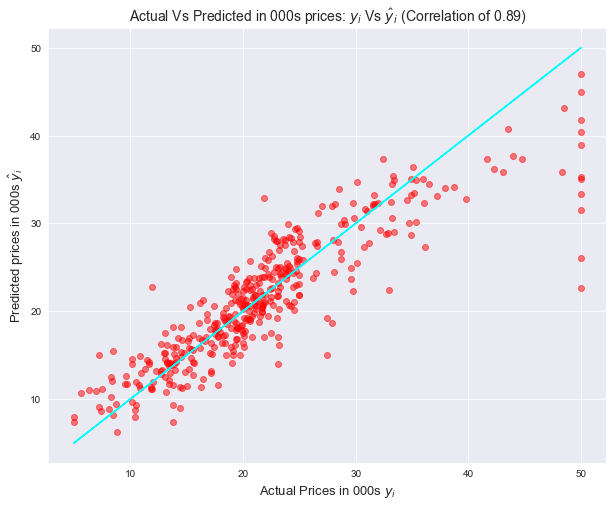

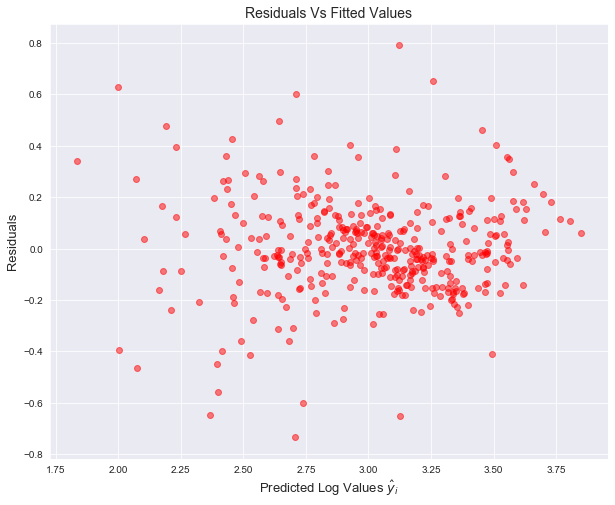

In [102]:
# Modified model: transformed (using log prices) and simplified (dropping two features)
prices = np.log(data['PRICE']) # Use Log Prices
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# Using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Residuals
# residuals = y_train - results.fittedvalues
# results.resid

# Graph of actual Vs predicted values
corr = round(y_train.corr(results.fittedvalues), 2)

plt.figure(figsize=(10,8))
plt.title(f'Actual Vs Predicted log prices: $y _i$ Vs $\hat y _i$ (Correlation of {corr})', fontsize=14)
plt.xlabel('Actual Log Prices $y _i$', fontsize=13)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize=13)

plt.scatter(x=y_train, y=results.fittedvalues, color='blue', alpha=0.5)
plt.plot(y_train, y_train, color='cyan')
plt.show()

# Graph for actual prices in 000s
plt.figure(figsize=(10,8))
plt.title(f'Actual Vs Predicted in 000s prices: $y _i$ Vs $\hat y _i$ (Correlation of {corr})', fontsize=14)
plt.xlabel('Actual Prices in 000s $y _i$', fontsize=13)
plt.ylabel('Predicted prices in 000s $\hat y _i$', fontsize=13)

plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, color='red', alpha=0.5)
plt.plot(np.e**y_train, np.e**y_train, color='cyan')
plt.show()

# Graph for Residuals Vs Fitted Values
plt.figure(figsize=(10,8))
plt.title(f'Residuals Vs Fitted Values', fontsize=14)
plt.xlabel('Predicted Log Values $\hat y _i$', fontsize=13)
plt.ylabel('Residuals', fontsize=13)

plt.scatter(x=results.fittedvalues, y=results.resid, color='red', alpha=0.5)
plt.show()

# Mean Squared Error & R-Squared
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)

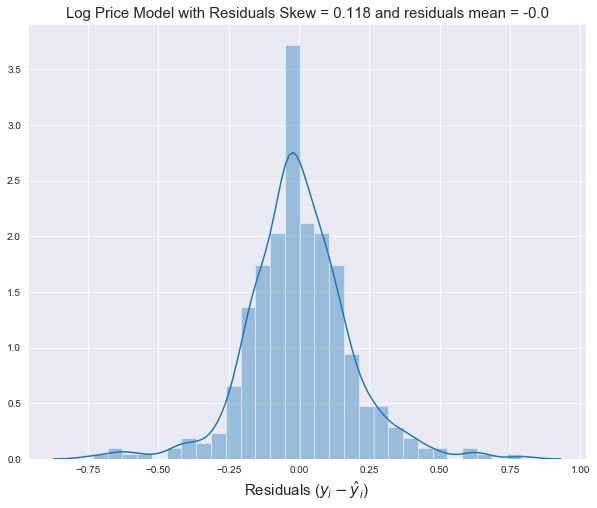

In [103]:
#  Distribution of Residuals (Log Prices) --- Checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

plt.figure(figsize=(10,8))
plt.title(f'Log Price Model with Residuals Skew = {resid_skew} and residuals mean = {resid_mean}', fontsize=15)
plt.xlabel('Residuals ($y _i - \hat y _i$)', fontsize=15)

sns.distplot(results.resid)

COMPARING THE MODIFIED MODEL AND THE ORIGINAL MODEL (RESIDUALS)

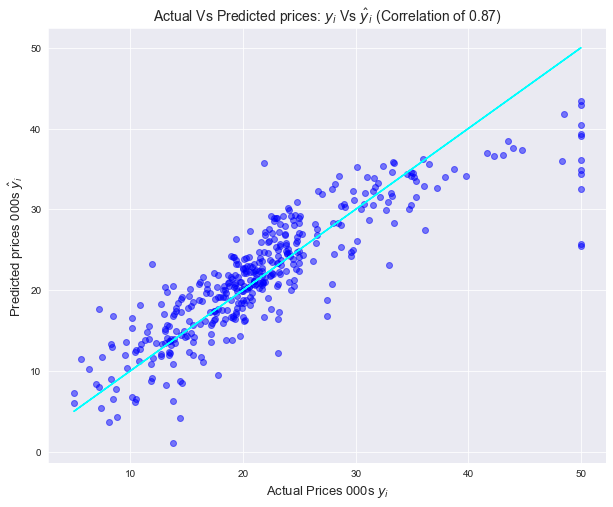

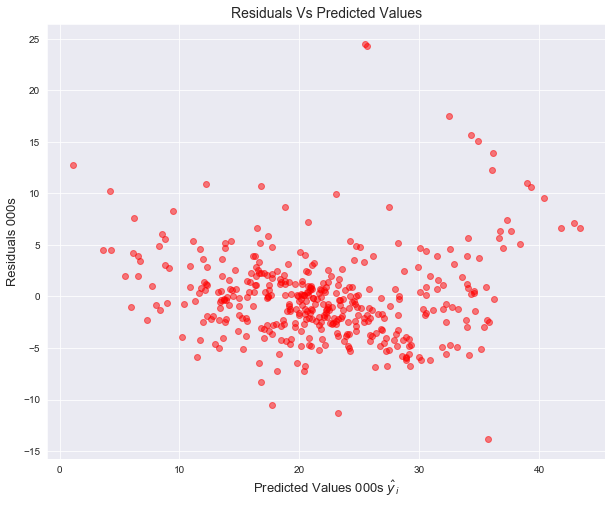

In [104]:
# Original model: Normal prices and All Features
prices = data['PRICE']
features = data.drop('PRICE', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# Using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Graph of actual Vs predicted values
corr = round(y_train.corr(results.fittedvalues), 2)

plt.figure(figsize=(10,8))
plt.title(f'Actual Vs Predicted prices: $y _i$ Vs $\hat y _i$ (Correlation of {corr})', fontsize=14)
plt.xlabel('Actual Prices 000s $y _i$', fontsize=13)
plt.ylabel('Predicted prices 000s $\hat y _i$', fontsize=13)

plt.scatter(x=y_train, y=results.fittedvalues, color='blue', alpha=0.5)
plt.plot(y_train, y_train, color='cyan')
plt.show()

# Graph for Residuals Vs Fitted Values
plt.figure(figsize=(10,8))
plt.title(f'Residuals Vs Predicted Values', fontsize=14)
plt.xlabel('Predicted Values 000s $\hat y _i$', fontsize=13)
plt.ylabel('Residuals 000s', fontsize=13)

plt.scatter(x=results.fittedvalues, y=results.resid, color='red', alpha=0.5)
plt.show()

# Mean Squared Error & R-Squared
full_normal_mse = round(results.mse_resid, 3)
full_normal_rsquared = round(results.rsquared, 3)

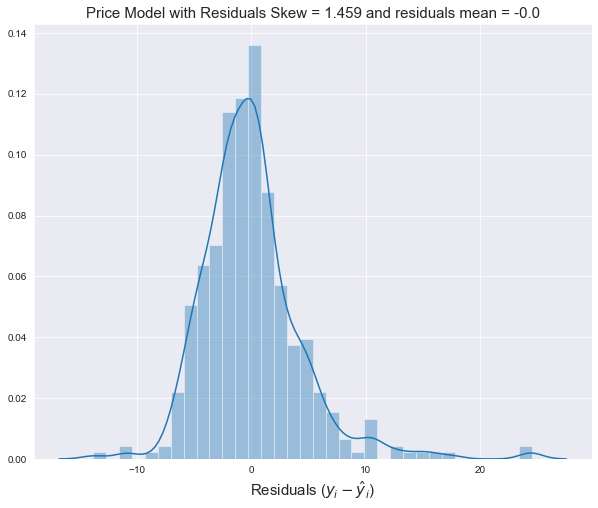

In [105]:
#  Distribution of Residuals (Original Model) --- Checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

plt.figure(figsize=(10,8))
plt.title(f'Price Model with Residuals Skew = {resid_skew} and residuals mean = {resid_mean}', fontsize=15)
plt.xlabel('Residuals ($y _i - \hat y _i$)', fontsize=15)

sns.distplot(results.resid)

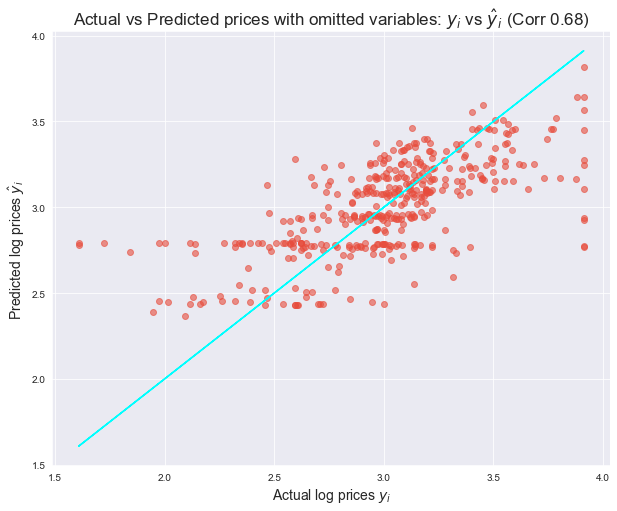

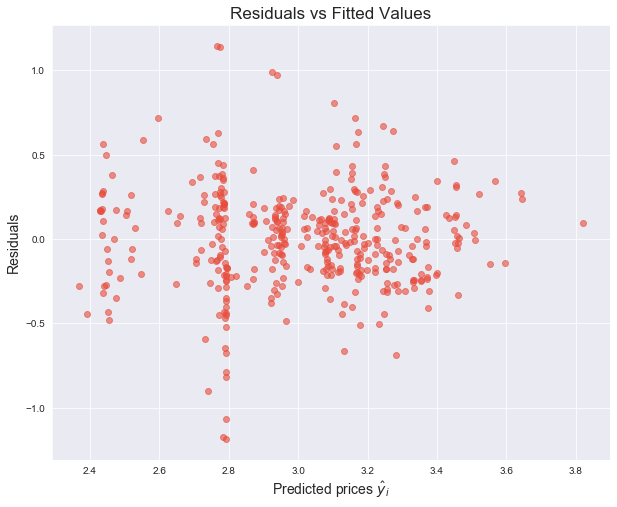

In [118]:
# Model Omitting Key Features using log prices
prices = np.log(data['PRICE'])
features = data.drop(['PRICE', 'INDUS', 'AGE', 'LSTAT', 'RM', 'NOX', 'CRIM'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Graph of Actual vs. Predicted Prices
plt.figure(figsize=(10,8))
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, c='#e74c3c', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices with omitted variables: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values
plt.figure(figsize=(10,8))
plt.scatter(x=results.fittedvalues, y=results.resid, c='#e74c3c', alpha=0.6)

plt.xlabel('Predicted prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

# Mean Squared Error & R-Squared
omitted_var_mse = round(results.mse_resid, 3)
omitted_var_rsquared = round(results.rsquared, 3)

In [116]:
pd.DataFrame({'R-Squared': [reduced_log_rsquared, full_normal_rsquared, omitted_var_rsquared],
             'MSE': [reduced_log_mse, full_normal_mse, omitted_var_mse], 
             'RMSE': np.sqrt([reduced_log_mse, full_normal_mse, omitted_var_mse])}, 
            index=['Reduced Log Model', 'Full Normal Price Model', 'Omitted Var Model'])

,R-Squared,MSE,RMSE
Reduced Log Model,0.792,0.035,0.187083
Full Normal Price Model,0.750,19.921,4.463295
Omitted Var Model,0.460,0.090,0.300000


In [135]:
# Challenge: Our estimate for a house price is $30,000. Calculate the upper and lower bound
# for a 95% prediction interval using the reduced log model

print('One (1) Standard Deviation in log prices is: ', round(np.sqrt(reduced_log_mse), 3))
print('Two (2) Standard Deviation in log prices is: ', 2*round(np.sqrt(reduced_log_mse), 3))

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)

print('\n')
print('The upper bound log price at the 95% confidence interval is: ', upper_bound)
print('The upper bound price at the 95% confidence interval is $', np.e**upper_bound * 1000)
print('The lower bound log price at the 95% confidence interval is: ', lower_bound)
print('The lower bound price at the 95% confidence interval is $', np.e**lower_bound * 1000)

One (1) Standard Deviation in log prices is:  0.187
Two (2) Standard Deviation in log prices is:  0.374


The upper bound log price at the 95% confidence interval is:  3.7753631203395495
The upper bound price at the 95% confidence interval is $ 43613.34233239937
The lower bound log price at the 95% confidence interval is:  3.0270316429847615
The lower bound price at the 95% confidence interval is $ 20635.886906824155
